# ITSLIVE Glacier Velocities

In [17]:
import itslive

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from datetime import date

itslive.__version__

ModuleNotFoundError: No module named 'cartopy'

In [2]:
point = (-46.0, 70.1)
# cubes = itslive.cubes.find_by_bbox(-48.0,60.0,-45.1,70.0)
# cubes = itslive.cubes.find_by_polygon()
cubes = itslive.velocity_cubes.find([point])
cubes

[{'type': 'Feature',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-47.602562, 69.871451],
     [-45.0, 69.891805],
     [-45.0, 70.789059],
     [-47.726311, 70.767681],
     [-47.602562, 69.871451]]]},
  'properties': {'fill-opacity': -0.0012004801920768582,
   'fill': 'red',
   'roi_percent_coverage': 100.12004801920769,
   'geometry_epsg': {'type': 'Polygon',
    'coordinates': [[[-100000, -2200000],
      [0, -2200000],
      [0, -2100000],
      [-100000, -2100000],
      [-100000, -2200000]]]},
   'datacube_exist': 1,
   'zarr_url': 'http://its-live-data.s3.amazonaws.com/datacubes/v02/N70W040/ITS_LIVE_vel_EPSG3413_G0120_X-50000_Y-2150000.zarr',
   'epsg': 3413}}]

In [3]:
points=[(-45.1, 73.1),
        (-45.3, 70.1),
        (-46.1, 71.2)]

velocities = itslive.velocity_cubes.get_time_series(points=points)
print(f"{len(velocities)} time series found")
# Velocities is now an array with time series for each lat,lon pair
velocities[1]["time_series"]

3 time series found


<xarray.Dataset>
Dimensions:         (mid_date: 13379)
Coordinates:
  * mid_date        (mid_date) datetime64[ns] 2019-05-08T03:32:58.070045952 ....
    x               float64 -1.135e+04
    y               float64 -2.177e+06
Data variables:
    mission_img1    (mid_date) <U1 ...
    vx              (mid_date) float32 ...
    satellite_img1  (mid_date) <U2 ...
    vx_error        (mid_date) float64 ...
    vy_error        (mid_date) float64 ...
    v               (mid_date) float32 ...
    v_error         (mid_date) float32 ...
    date_dt         (mid_date) timedelta64[ns] ...
    vy              (mid_date) float32 ...
Attributes: (12/18)
    GDAL_AREA_OR_POINT:         Area
    author:                     ITS_LIVE, a NASA MEaSUREs project (its-live.j...
    autoRIFT_parameter_file:    http://its-live-data.s3.amazonaws.com/autorif...
    datacube_software_version:  1.0
    date_created:               09-Jun-2022 23:30:36
    date_updated:               09-Jun-2022 23:30:36
    ...                         ...
    s3:                         s3://its-live-data/datacubes/v02/N70W040/ITS_...
    skipped_granules:           s3://its-live-data/datacubes/v02/N70W040/ITS_...
    time_standard_img1:         UTC
    time_standard_img2:         UTC
    title:                      ITS_LIVE datacube of image_pair velocities
    url:                        https://its-live-data.s3.amazonaws.com/datacu...

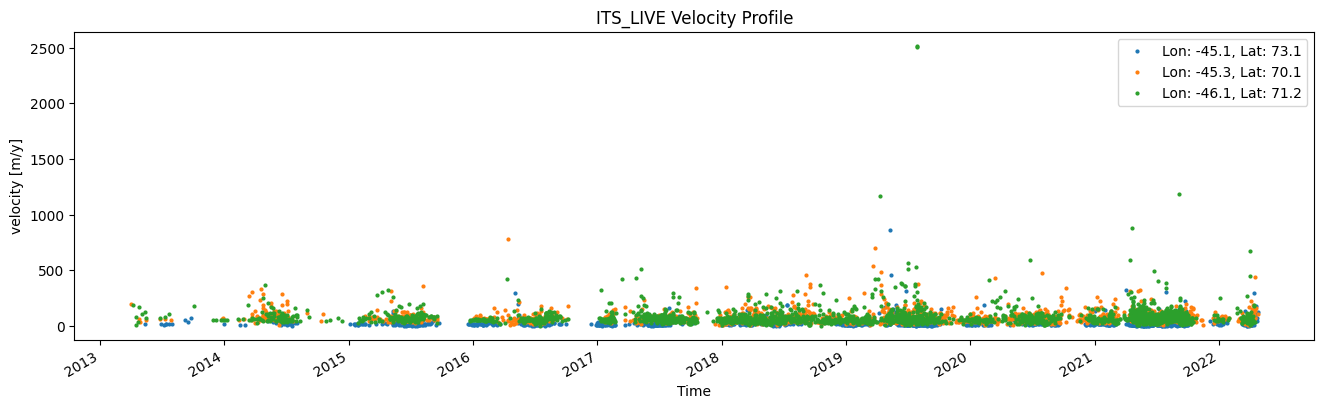

In [4]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (16, 4)
fig, ax = plt.subplots()

color_index = 0

for vel in velocities:
    latitude = vel["requested_point_geographic_coordinates"][1]
    longitude = vel["requested_point_geographic_coordinates"][0]
    
    point_label = f"Lon: {longitude}, Lat: {latitude}"
    vel["time_series"].v.plot(ax=ax,
                              linestyle="None",
                              marker="o",
                              markersize=2,
                              c=plt.cm.tab10(color_index),
                              label=point_label,
                              add_legend=True)
    color_index+=1

plt.xlabel("Time")
plt.title("ITS_LIVE Velocity Profile") 
ax.legend(loc="upper right")

## Velocity Pair NetCDF

We can also find and download velocity pair NetCDFs from the ITS_LIVE dataset using the `itslive.velocity_pairs` functions.


In [5]:
start_date = date(2014, 1, 30)
end_date = date(2017, 1, 30)
# bbox = min Longitude , min Latitude , max Longitude , max Latitude 
# ~Iceland for this example
region_of_interest=[-23.4008, 63.9180, -14.6777, 66.0447]

files = itslive.velocity_pairs.find(
    bbox=region_of_interest,
    min_interval=7, #days
    max_interval=30,
    start=start_date,
    end=end_date,
    percent_valid_pixels=40 # % of valid glacier pixels
)

Finding matching velocity pairs... 


122it [00:03, 31.33it/s]                                                                                                                

860 pairs found


In [16]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [6]:
files[1]

'https://its-live-data.s3.amazonaws.com/velocity_image_pair/sentinel1/v02/N60W020/S1A_IW_SLC__1SDV_20150721T185841_20150721T185909_006913_009582_EEF2_X_S1A_IW_SLC__1SDV_20150802T185902_20150802T185929_007088_009A6B_FC9B_G0120V02_P098.nc'

In [7]:
# 
downloaded_files = itslive.velocity_pairs.download(files[0:4], "data")
downloaded_files

QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

[PosixPath('data/S1A_IW_SLC__1SDV_20160722T073249_20160722T073319_012258_0130C3_CFAC_X_S1A_IW_SLC__1SDV_20160803T073250_20160803T073320_012433_013693_3FB3_G0120V02_P098.nc'),
 PosixPath('data/S1A_IW_SLC__1SDV_20150721T185841_20150721T185909_006913_009582_EEF2_X_S1A_IW_SLC__1SDV_20150802T185902_20150802T185929_007088_009A6B_FC9B_G0120V02_P098.nc'),
 PosixPath('data/S1A_IW_SLC__1SDV_20150721T185816_20150721T185843_006913_009582_7DE2_X_S1A_IW_SLC__1SDV_20150802T185837_20150802T185904_007088_009A6B_B6BF_G0120V02_P098.nc'),
 PosixPath('data/S1A_IW_SLC__1SDV_20160724T183436_20160724T183505_012294_0131EF_1D18_X_S1A_IW_SLC__1SDV_20160805T183437_20160805T183506_012469_0137C8_AB6A_G0120V02_P098.nc')]

In [8]:
import xarray as xr

ds = xr.open_dataset(downloaded_files[1])
ds

<xarray.Dataset>
Dimensions:           (x: 2041, y: 1601)
Coordinates:
  * x                 (x) float64 9.392e+05 9.393e+05 ... 1.184e+06 1.184e+06
  * y                 (y) float64 -2.385e+06 -2.385e+06 ... -2.577e+06
Data variables: (12/13)
    img_pair_info     object ...
    mapping           object ...
    vx                (y, x) float32 ...
    vy                (y, x) float32 ...
    v                 (y, x) float32 ...
    v_error           (y, x) float32 ...
    ...                ...
    va                (y, x) float32 ...
    M11               (y, x) float32 ...
    M12               (y, x) float32 ...
    chip_size_width   (y, x) float32 ...
    chip_size_height  (y, x) float32 ...
    interp_mask       (y, x) float32 ...
Attributes: (12/14)
    GDAL_AREA_OR_POINT:         Area
    Conventions:                CF-1.8
    date_created:               12-Apr-2023 17:09:57
    title:                      autoRIFT surface velocities
    autoRIFT_software_version:  1.5.0
    autoRIFT_parameter_file:    http://its-live-data.s3.amazonaws.com/autorif...
    ...                         ...
    motion_detection_method:    feature
    motion_coordinates:         radar, map
    author:                     Alex S. Gardner, JPL/NASA; Yang Lei, GPS/Caltech
    institution:                NASA Jet Propulsion Laboratory (JPL), Califor...
    source:                     NASA MEaSUREs ITS_LIVE project. Processed by ...
    references:                 When using this data, please acknowledge the ...

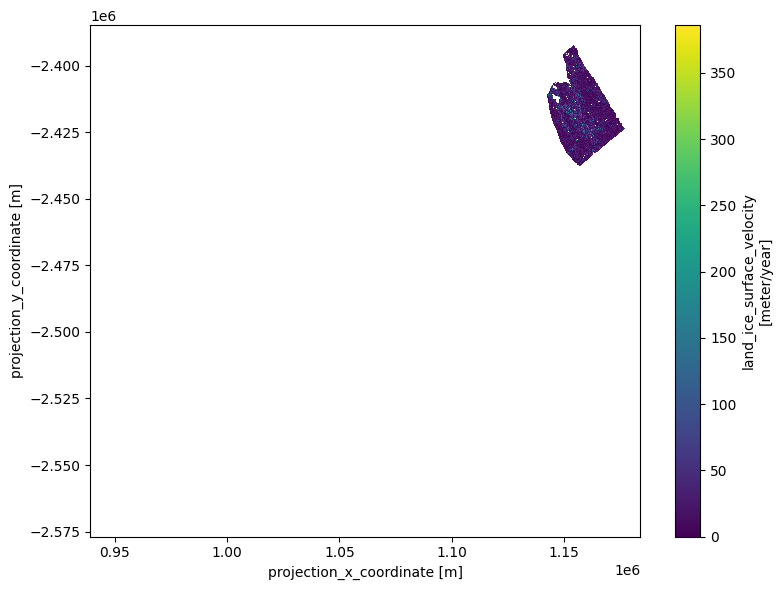

In [15]:
plt.rcParams["figure.figsize"] = (8, 6)

ds.v.plot()
plt.tight_layout()